# Тестирование модели YOLOv8 версии nano, дообученной на задачу детекции автомобилей на дорожных фотографиях.

## Загружаем обученную модель

In [6]:
from ultralytics import YOLO
model = YOLO('C:\\users\\sasha\\Desktop/Car detect/New_hope/runs/detect/train23/weights/best.pt')

## Подадим на вход нейросети тестовые данные из обучающего датасета

In [3]:
model.val(data='C:\\users\\sasha\\Desktop/Car detect/New_hope/dataset/data.yaml', split='test')

Ultralytics 8.3.110  Python-3.12.9 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce GTX 1660, 6144MiB)
val: Fast image access  (ping: 0.10.0 ms, read: 5.81.7 MB/s, size: 36.2 KB)


val: Scanning C:\Users\sasha\Desktop\Car detect\New_hope\dataset\test\labels... 1489 images, 202 backgrounds, 0 corrupt: 100%|██████████| 1489/1489 [00:04<00:00, 365.62it/s]

val: New cache created: C:\Users\sasha\Desktop\Car detect\New_hope\dataset\test\labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:14<00:00,  6.70it/s]


                   all       1489       9602      0.843      0.504      0.585      0.326
                 biker        124        181      0.784      0.591      0.648      0.338
                   car       1260       6441      0.847      0.761      0.828      0.537
            pedestrian        340        938      0.695      0.456      0.545      0.246
          trafficLight        167        267      0.819      0.663      0.759      0.403
    trafficLight-Green        197        547      0.749      0.534      0.581      0.241
trafficLight-GreenLeft         25         43      0.866      0.326      0.453      0.261
      trafficLight-Red        253        665      0.872      0.672      0.752      0.415
  trafficLight-RedLeft        105        145      0.854      0.676      0.761      0.432
   trafficLight-Yellow         14         40          1      0.141      0.337      0.165
trafficLight-YellowLeft          4          4          1          0          0          0
                 tru

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000240FB5006E0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,  

## Выведем нормализованную Confusion Matrix

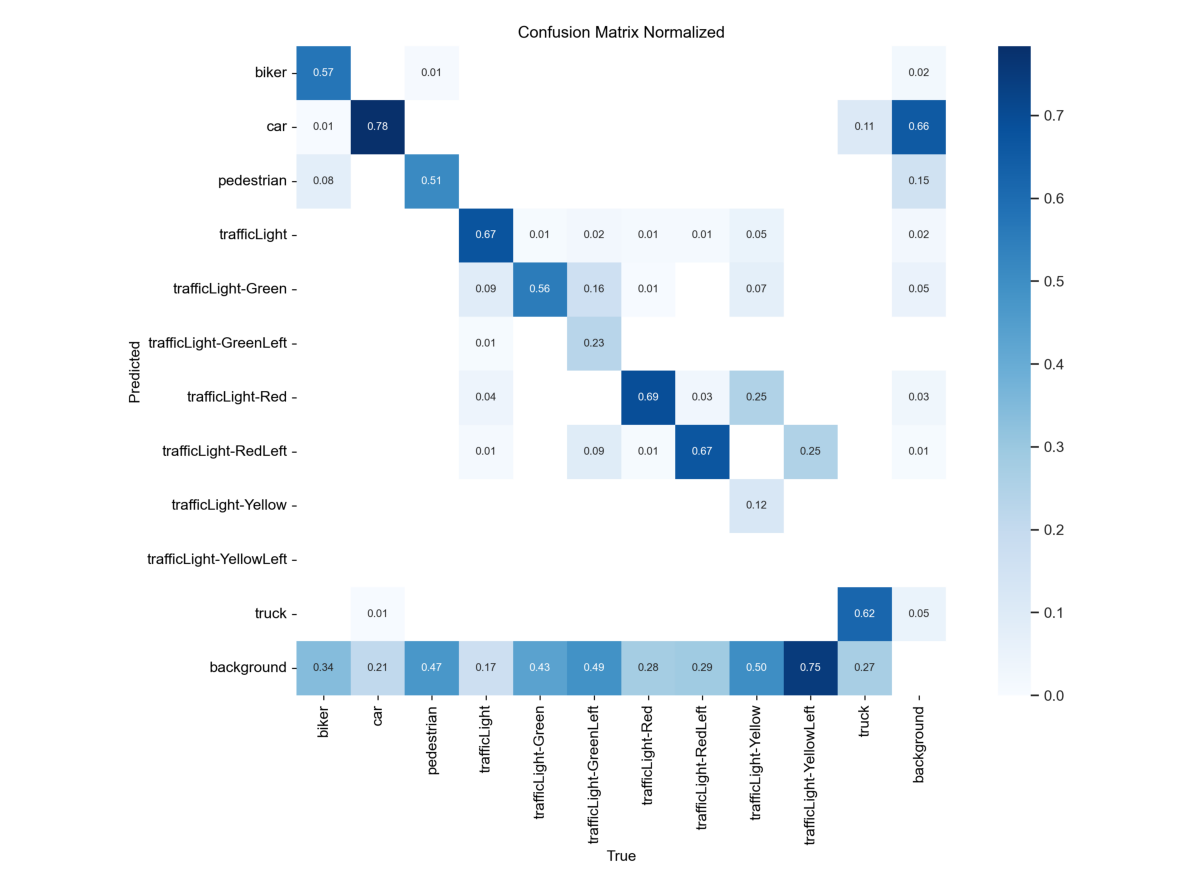

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("runs/detect/val2/confusion_matrix_normalized.png")
plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

### Выводы по матрице
1) Большая часть машин была обнаружена и правильно классфицирована. Аналогично с классами "biker", "pedestrant", "truck"
2) Ошибка классификации минимально, основные недочёты связаны с детекцией объектов. Это связанно с тем, что в тестовых данных на фотографиях много мелких объектов, которые достаточно сложно детектировать с таким количеством параметров модели 

П и Р кривые вывести, сказать, что не меняем значение уверености (конфиденс) 0.25, так как в данной задаче важен баланс между точностью и полнотой

ПР кривую вывести, сказать что для машин всё хорошо

Запустить свои какие-нибудь фотки и поделать выводы

## Рассмотрим графики точности (precision) и полноты (recall) от порога уверенности (confidence)

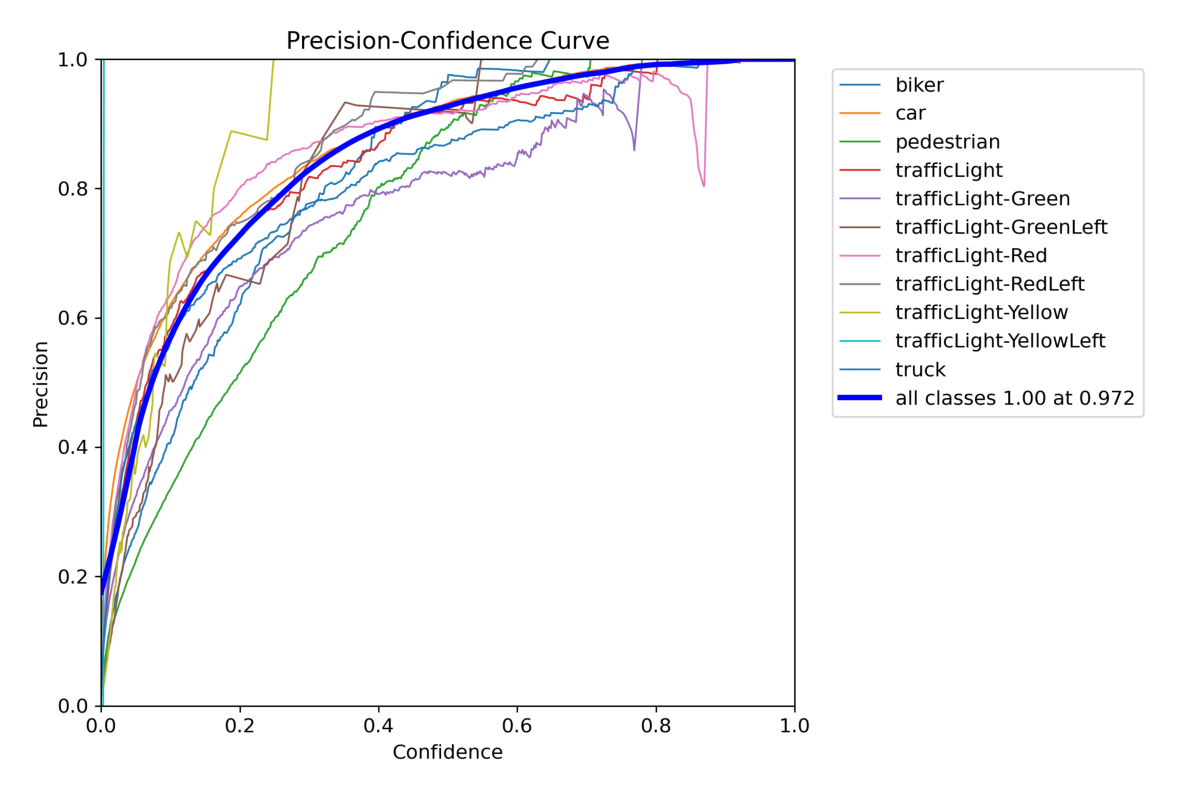

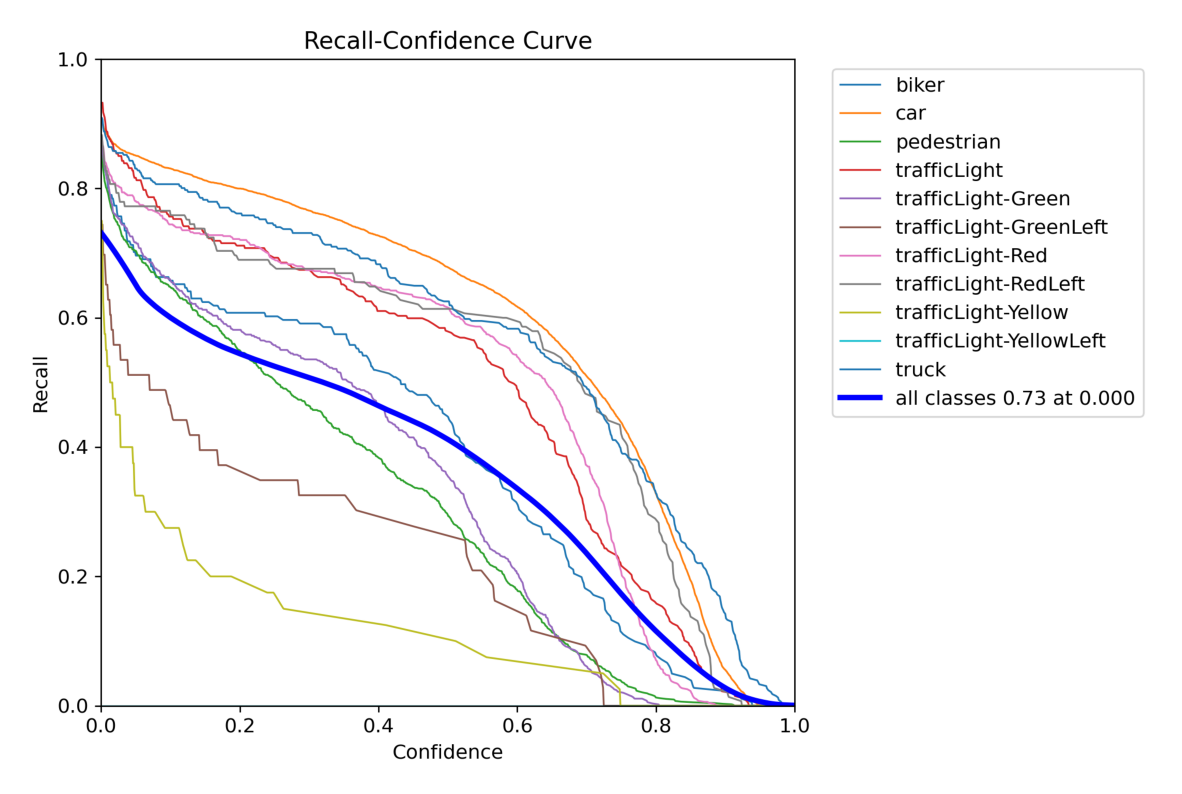

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("runs/detect/val2/P_curve.png")
plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
img = cv2.imread("runs/detect/val2/R_curve.png")
plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

### Выводы по графику
Так как для задачи в равной мере важны как точность, так и полнота, то можно оставить значение по умолчанию для порога уверенности (0.25)

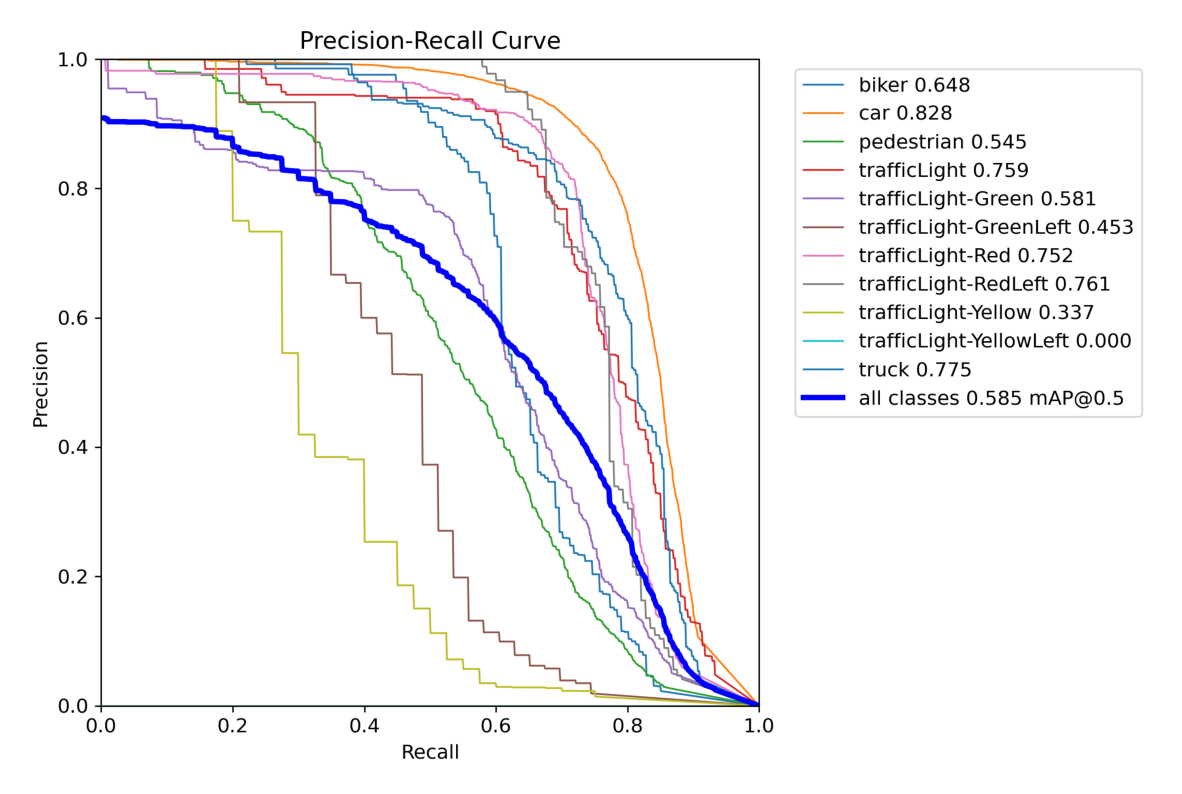

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("runs/detect/val2/PR_curve.png")
plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

### Выводы по графику
Для ключевых классов (машины, мотоциклы, грузовики) площадь под кривыми недалека от единицы

## Проведём тест модели на данных не из обучающего датасета

In [9]:
results = model.predict('C:\\Users\\sasha\\Desktop\\Car detect\\For review\\img_for_test\\')
for result in results:
    result.save()  # Сохранить результат


image 1/4 C:\Users\sasha\Desktop\Car detect\For review\img_for_test\1003.jpg: 320x512 7 cars, 2 trafficLight-Reds, 1 trafficLight-RedLeft, 39.3ms
image 2/4 C:\Users\sasha\Desktop\Car detect\For review\img_for_test\10205.jpg: 320x512 5 cars, 35.9ms
image 3/4 C:\Users\sasha\Desktop\Car detect\For review\img_for_test\10400.jpg: 320x512 1 car, 1 truck, 27.1ms
image 4/4 C:\Users\sasha\Desktop\Car detect\For review\img_for_test\10420.jpg: 320x512 7 cars, 6 pedestrians, 2 trafficLight-Greens, 33.8ms
Speed: 4.0ms preprocess, 34.0ms inference, 49.3ms postprocess per image at shape (1, 3, 320, 512)


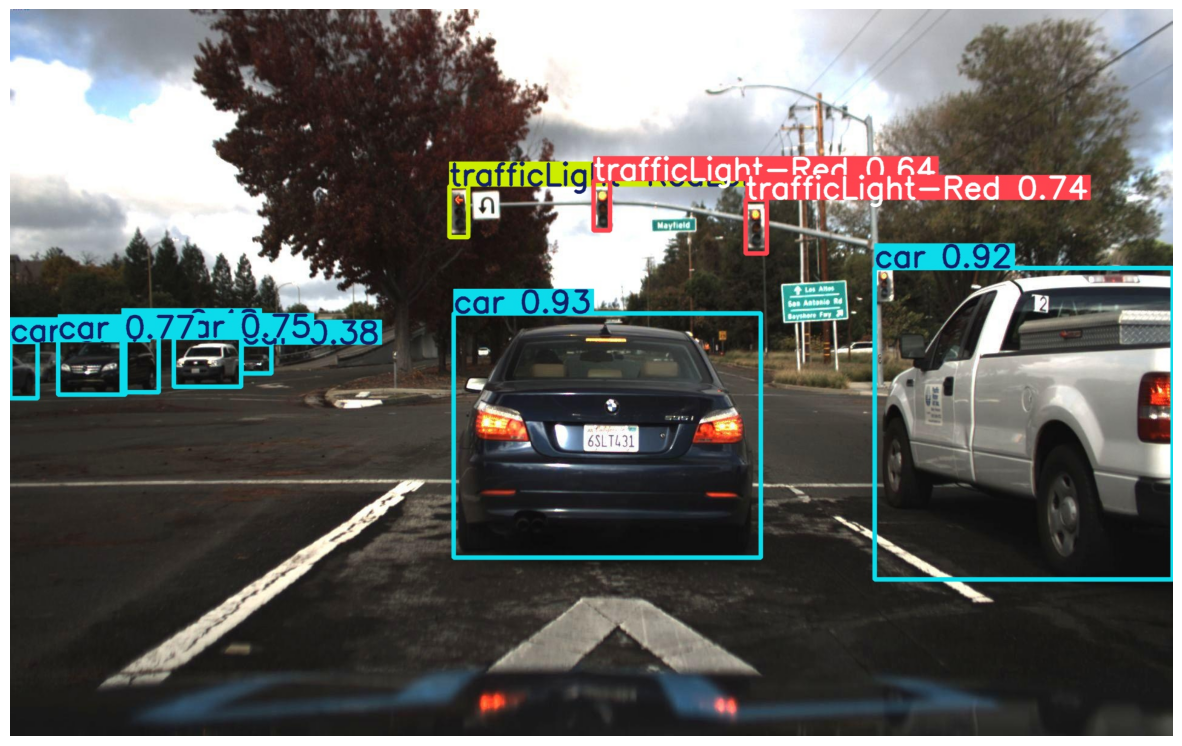

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("results_1003.jpg")
plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

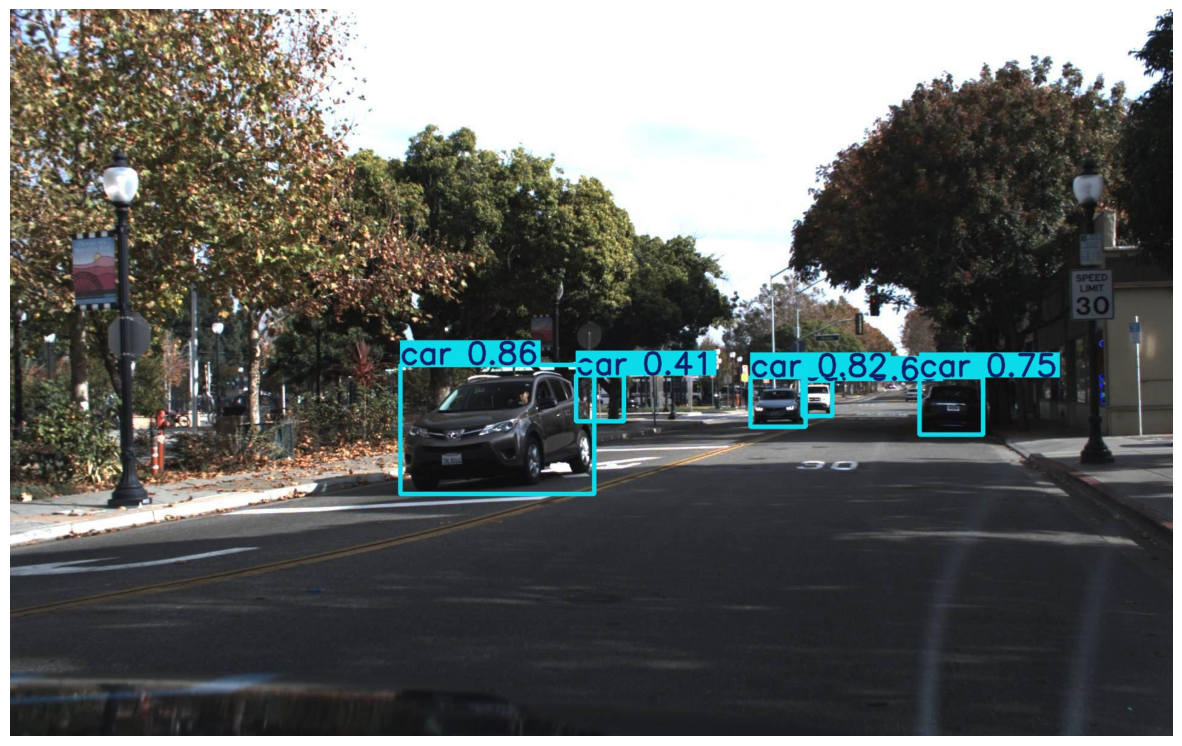

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("results_10205.jpg")
plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

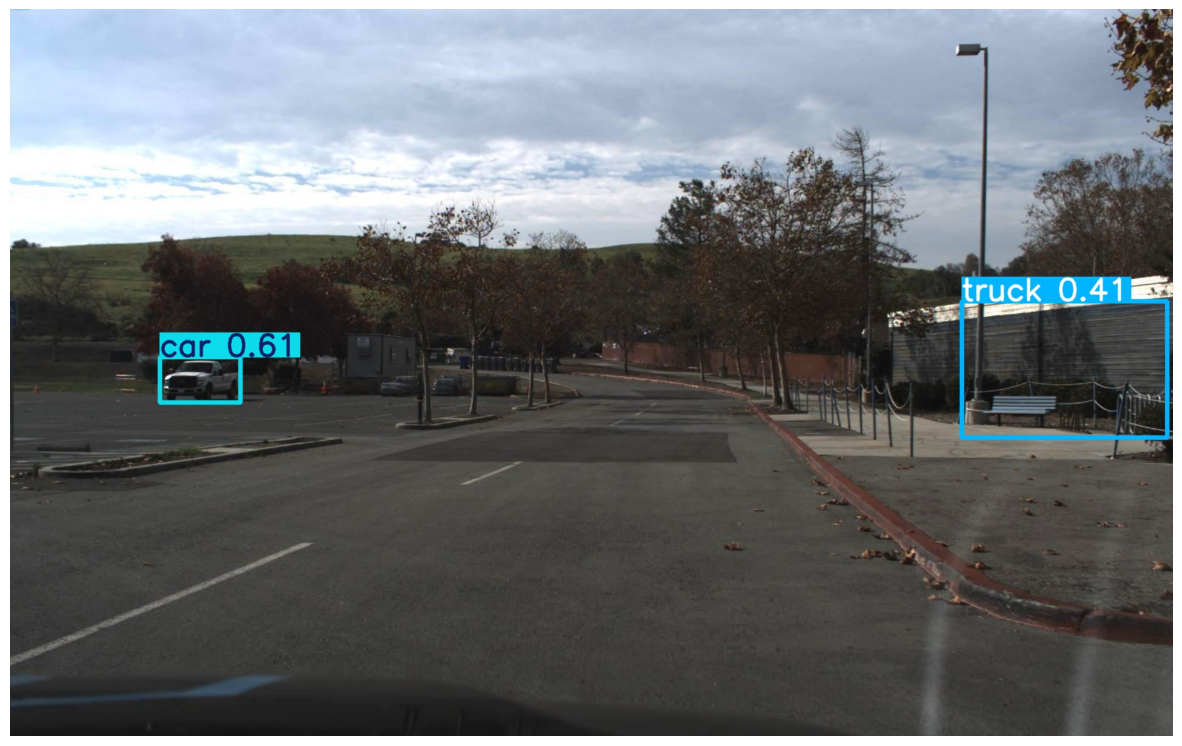

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("results_10400.jpg")
plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

### Выводы по тестам
1) Модель отлично справляет с детекцией и классификацией автомобилей
2) Модель также обучилась различать различные знаки светофора
3) Класс грузовиков остаётся проблемным для модели